In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df1=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df1_m=df1.melt(id_vars=['Country/Region', 'Province/State','Lat','Long'])
df1_m.rename(columns={'variable':'Date','Province/State':'State','Country/Region':'Country','value':'confirmed'},inplace=True)
df1_m.drop(['Lat','Long'],axis=1, inplace=True)

df2=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df2_m=df2.melt(id_vars=['Country/Region', 'Province/State','Lat','Long'])
df2_m.rename(columns={'variable':'Date_1','Province/State':'State_1','Country/Region':'Country_1','value':'recovered'},inplace=True)
df2_m.drop(['Lat','Long'],axis=1, inplace=True)

df3=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df3_m=df3.melt(id_vars=['Country/Region','Province/State','Lat','Long'])
df3_m.rename(columns={'variable':'Date_2','Province/State':'State_2','Country/Region':'Country_2','value':'death'},inplace=True)
df3_m.drop(['Lat','Long'],axis=1, inplace=True)

covid =pd.concat([df1_m,df2_m,df3_m], axis=1)
covid

,Country,State,Date,confirmed,Country_1,State_1,Date_1,recovered,Country_2,State_2,Date_2,death
0,Afghanistan,NaN,1/22/20,0,Afghanistan,NaN,1/22/20,0.0,Afghanistan,NaN,1/22/20,0
1,Albania,NaN,1/22/20,0,Albania,NaN,1/22/20,0.0,Albania,NaN,1/22/20,0
2,Algeria,NaN,1/22/20,0,Algeria,NaN,1/22/20,0.0,Algeria,NaN,1/22/20,0
3,Andorra,NaN,1/22/20,0,Andorra,NaN,1/22/20,0.0,Andorra,NaN,1/22/20,0
4,Angola,NaN,1/22/20,0,Angola,NaN,1/22/20,0.0,Angola,NaN,1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226911,West Bank and Gaza,NaN,3/30/22,655750,NaN,NaN,NaN,NaN,West Bank and Gaza,NaN,3/30/22,5655
226912,Winter Olympics 2022,NaN,3/30/22,535,NaN,NaN,NaN,NaN,Winter Olympics 2022,NaN,3/30/22,0
226913,Yemen,NaN,3/30/22,11805,NaN,NaN,NaN,NaN,Yemen,NaN,3/30/22,2143
226914,Zambia,NaN,3/30/22,316550,NaN,NaN,NaN,NaN,Zambia,NaN,3/30/22,3966


df3_m.rename(columns={'variable':'Date_2','Province/State':'State_2','Country/Region':'Country_2','value':'death'},inplace=True)
df3_m

In [19]:
grouped = covid.groupby(['Country'])
cc = grouped.sum().reset_index()
cc

,Country,confirmed,recovered,death
0,Afghanistan,63005042,92881393.0,2743665
1,Albania,77725311,91924836.0,1261278
2,Algeria,90177986,107175228.0,2535138
3,Andorra,8913514,96431554.0,73288
4,Angola,24739323,90485871.0,572994
...,...,...,...,...
193,West Bank and Gaza,176183195,74115092.0,1797661
194,Winter Olympics 2022,30422,69686004.0,0
195,Yemen,3786940,64627953.0,774371
196,Zambia,82147557,63770983.0,1251330


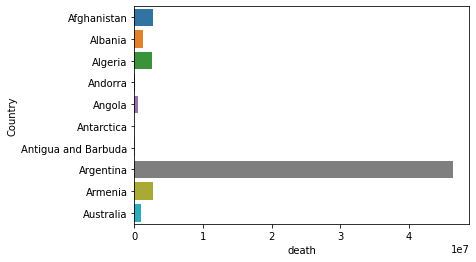

In [17]:
death = cc.head(10)
sns.barplot(x=death['death'],y=death['Country'])

Text(0, 0.5, 'Country')

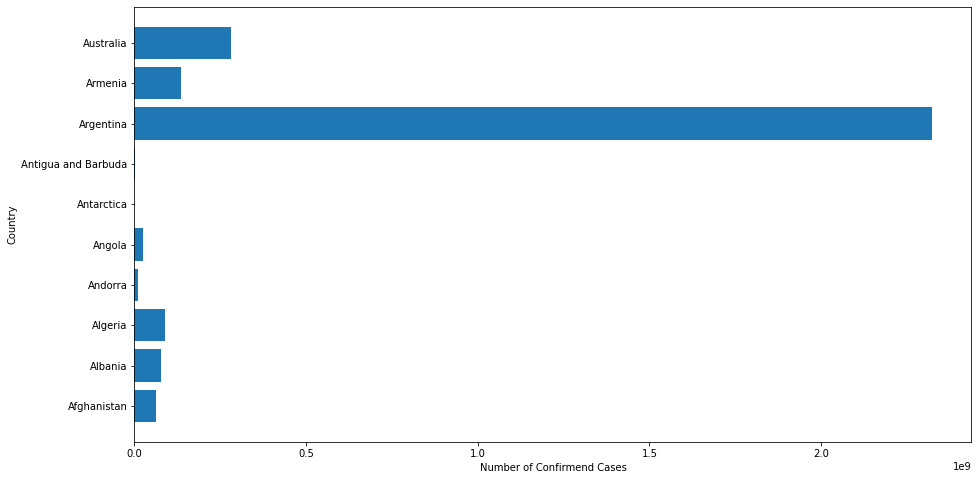

In [11]:
confirmed = cc.head(10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(confirmed['Country'], confirmed['confirmed'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('Country')

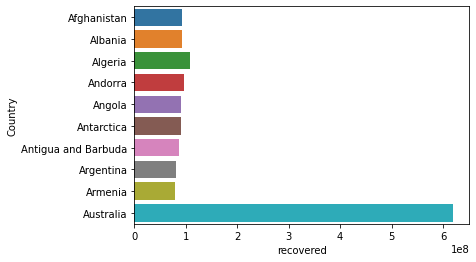

In [14]:
recovered = cc.head(10)
sns.barplot(x=recovered['recovered'],y=recovered['Country'])